In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [85]:
#Variables...

# Puck HSV Bounds (Green)
pucklowerBound=np.array([70,80,50])
puckupperBound=np.array([95,255,180])

# Bot HSV Bounds (White 3dPrint)
botlowerBound=np.array([95,15,165])
botupperBound=np.array([110,30,180])

In [86]:
def cleanMask(dirty_mask):
    points = []
    for i in range(dirty_mask.shape[0]):
        for j in range(dirty_mask.shape[1]):
            if dirty_mask[i, j] == 255:
                points.append((i,j))
    #Remove exterior dots
    padding = 2
    from collections import deque
    remaining_points = set(points)
    saved_locations = []
    while remaining_points:
        current_point = remaining_points.pop()
        y = current_point[0]
        x = current_point[1]
        saved_points = set()
        horizon = deque([(y-1,x-1),(y+1,x-1),(y-1,x+1),(y+1,x+1)])
        saved_points.add(current_point)
        while(len(horizon) > 0):
            to_check = horizon.pop()
            y = to_check[0]
            x = to_check[1]
            if to_check in remaining_points:
                remaining_points.discard(to_check)
                horizon.appendleft((y-1,x-1))
                horizon.appendleft((y+1,x-1))
                horizon.appendleft((y-1,x+1))
                horizon.appendleft((y+1,x+1))
                saved_points.add(to_check)
        saved_locations.append(saved_points)
    cleaned_mask = dirty_mask.copy()
    cleaned_mask[:,:] = 0
    max_location = set()
    for location in saved_locations:
        if location:
            if len(location) > len(max_location):
                max_location = location

    for y, x in max_location:
        cleaned_mask[y-padding:y+padding,x-padding:x+padding] = 255
        
    return cleaned_mask;

In [87]:
def getHSVMask(hsv_img, range_lower_bound, range_upper_bound):
    hsv_mask=cv2.inRange(hsv_img,range_lower_bound,range_upper_bound);
    return hsv_mask;

In [88]:
def getOpenCloseMask(orig_mask):
    kernelOpen=np.ones((5,5))
    kernelClose=np.ones((20,20))
    
    mask_open=cv2.morphologyEx(orig_mask,cv2.MORPH_OPEN,kernelOpen);
    mask_close=cv2.morphologyEx(orig_mask,cv2.MORPH_CLOSE,kernelClose);
    
    return mask_open,mask_close;

In [89]:
def getMaskRectangle(clean_mask):
    # Get contours
    _, contours, _=cv2.findContours(clean_mask.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE);
    
    # Determine biggest contour and use that.
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours];
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1];

    #print 'biggest_contour';
    #biggest_contour;
    
    # Generate rect from contour
    x,y,w,h = cv2.boundingRect(biggest_contour);
    
    return x,y,w,h;

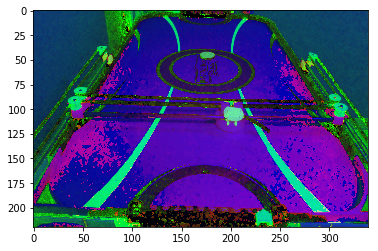

In [90]:
# Get Image
img=cv2.imread("2.jpg");
img=cv2.resize(img,(340,220));

#convert image to HSV
hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

In [65]:
# Get HSV Mask for bot and puck from HSV image.
puck_mask=getHSVMask(hsv_image.copy(),pucklowerBound, puckupperBound);
bot_mask=getHSVMask(hsv_image.copy(),botlowerBound,botupperBound);

In [66]:
#plt.imshow(puck_mask)
#plt.imshow(bot_mask)

In [67]:
#Get open & Close mask
puck_mask_open,puck_mask_close=getOpenCloseMask(puck_mask);
bot_mask_open,bot_mask_close=getOpenCloseMask(bot_mask);

In [68]:
#plt.imshow(puck_mask_close)
#plt.imshow(bot_mask_close)

In [72]:
# Clean Noise form mask
puck_mask_close_cleaned = cleanMask(puck_mask_close);
bot_mask_close_cleaned = cleanMask(bot_mask_close);

In [73]:
#plt.imshow(puck_mask_close_cleaned)
#plt.imshow(bot_mask_close_cleaned)

[[[ 40  85  18]
  [ 35  70  22]
  [ 30  71  18]
  [ 35  77  20]
  [ 43  99  18]
  [ 40  77  20]
  [ 42  67  19]
  [ 60  28  18]
  [ 45  54  19]
  [ 42  64  20]]

 [[ 35  22  69]
  [ 36  20  65]
  [ 35  25  62]
  [ 43  28  63]
  [ 34  27  67]
  [ 34  32  64]
  [ 35  21  72]
  [ 42  20  63]
  [ 43  27  67]
  [ 42  18  70]]

 [[ 35  24  65]
  [ 35  23  66]
  [ 30  24  63]
  [ 40  36  64]
  [ 51  32  56]
  [ 65  59  52]
  [ 62  63  53]
  [ 58  59  52]
  [ 48  54  61]
  [ 40  35  66]]

 [[ 35  24  65]
  [ 53  61  50]
  [ 68 163  83]
  [ 71 178 110]
  [ 70 181 110]
  [ 69 180 109]
  [ 69 176 107]
  [ 70 175 105]
  [ 70 185 106]
  [ 70 184 108]]

 [[ 58 133  25]
  [ 70 189 112]
  [ 69 177 111]
  [ 69 180 105]
  [ 69 172 110]
  [ 69 180 105]
  [ 70 183 103]
  [ 71 192 101]
  [ 70 185 106]
  [ 70 176 110]]

 [[ 68 163  97]
  [ 70 183 110]
  [ 69 182 108]
  [ 69 178 110]
  [ 69 181 103]
  [ 69 184 100]
  [ 70 193 102]
  [ 71 198  98]
  [ 70 194 101]
  [ 70 187 105]]

 [[ 61 167  32]
  [ 70 172 1

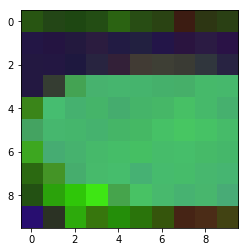

In [94]:
plt.imshow(hsv_image[40:50, 170:180, :])
print(hsv_image[40:50, 170:180, :])
#plotted = hsv_image.copy()
#plotted[110:150, 175:225, :] = (255, 255,255)
#plt.imshow(plotted)
#for i in range(puck_mask.shape[0]):
#    for j in range(puck_mask.shape[1]):
#        if puck_mask_close_cleaned[i,j]:
#            plotted[i,j] = (255, 255, 255)
#
#plt.imshow(plotted)
#plt.imshow(botMask)

In [79]:
px,py,pw,ph = getMaskRectangle(puck_mask_close_cleaned);
bx,by,bw,bh = getMaskRectangle(bot_mask_close_cleaned);

print(px,py,ph)
print(bx,by,bh)

(170, 42, 9)
(183, 93, 36)


In [82]:
# Draw locations of puck and bot on image.
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
cv2.rectangle(image,(px,py),(px+pw,py+ph),(0,255,0),1)
cv2.rectangle(image,(bx,by),(bx+bw,by+bh),(0,0,255),1)

array([[[110, 102,  89],
        [110,  94,  81],
        [112, 102,  90],
        ...,
        [117, 105,  89],
        [105,  92,  75],
        [105,  91,  78]],

       [[111, 102,  87],
        [118, 107,  92],
        [112, 100,  88],
        ...,
        [103,  89,  76],
        [ 97,  84,  69],
        [112, 100,  85]],

       [[111,  96,  83],
        [114, 100,  85],
        [115, 101,  88],
        ...,
        [108,  94,  81],
        [107,  94,  78],
        [103,  92,  74]],

       ...,

       [[ 31,  22,  14],
        [ 30,  20,  11],
        [ 36,  26,  18],
        ...,
        [146, 132, 103],
        [150, 138, 108],
        [130, 120,  91]],

       [[ 29,  20,  13],
        [ 27,  18,  11],
        [ 31,  22,  15],
        ...,
        [193, 180, 146],
        [189, 176, 144],
        [179, 168, 136]],

       [[ 19,  16,   6],
        [ 28,  19,  12],
        [ 31,  22,  15],
        ...,
        [156, 144, 128],
        [153, 141, 115],
        [156, 144, 118]]

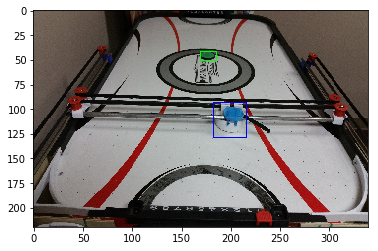

In [83]:
plt.imshow(image);